<a href="https://colab.research.google.com/github/kiranrode/README.md/blob/master/Linear_Regression_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 2: Model Fitting (Linear Regression)

In lesson 1, we got a some experience dealing with data. Now we can go ahead and do some machine learning with it! So as to not overwhelm ourselves, we'll start off with some simple models which will lay the groundwork for more complicated ones up ahead. Here, we will focus on the bottom half of the diagram below.

![alt text](https://revsearch-assets.s3.amazonaws.com/images/ds_process2.png)

## Learning Objectives:
* What is a model? What makes a model linear?
* Fit your own model by hand!
* A visual introduction to optimization - "What is a Loss Function?"
* How to train a linear model using the Scikit Learn library
* How to interpret a linear regression model
* Understand the interpretability <> accuracy tradeoff

## Definitions
* **Accuracy** - How close to the true value the computer can predict.
* **Interpretability** - How well we can explain why the computer made the decision it did.
* **Machine Learning (ML)** - Computer makes decisions *using the data*. i.e. the computer algorithm is clueless before looking at the data, then it becomes smart after looking at the data.
* **Machine Learning <> Artificial Intelligence** - Learned rules (based on data) <> hard coded rules, set by the programmer.
* **Multilinear regression** - Using more than one feature to predict our target. 
* **Linear combination** - An addition of our parameters. i.e. $y = 3x + 9z$.
* **Multicollinearity** - When our features are highly correlated with eachother.

Before we start, we need to import all the libraries we need. It's best practice to do this in the beginning. We'll be importing:

* [Pandas](https://pandas.pydata.org/pandas-docs/stable/): Library that will be used to load and manipulate the data
* [Numpy](https://docs.scipy.org/doc/numpy/reference/): Used to make optimized operations on matrices
* [Matplotlib](https://matplotlib.org): Used to visualize our data
* [Seaborn](https://seaborn.pydata.org/) is a python package for plotting like matplotlib. It is actually a library built on top of matplotlib. Sometimes it makes prettier plots :)


In [0]:
!pip install pycosmos --quiet

# The 'as' keyword just renames the library, making it easier for us to access it
import pandas as pd
import numpy as np
# seed the random generator to get consistent results
np.random.seed(0)
import seaborn as sns
from matplotlib import pyplot as plt
# Our score function. More explained later.
from sklearn.metrics import r2_score

from pycosmos import CosmosProject
tamu_datathon = CosmosProject('tamu_datathon')

## A (Linear) Model

To start off, we'll be trying to draw a line through our data points denoted by this formula for a line. This formula for the line is called a model.

$$
\hat{y} = w * x + b
$$

Simply, a model is a function that aims to take our features ($x$) as input and output our prediction for the target ($\hat{y}$). The carrot above the y is called a *hat* and is used to denote  our prediction/aprozimation of the $y$ in our data, i.e. $\hat{y}\approx y$.

* **Data**
  * **Target Variable:** ($\hat{y}$) This is the variable that you're trying to predict given other values. This is also called the _response_ / _predicted_ / _dependent_ / _label_ variable.
  * **Feature Variable:** ($x$)  These are the variables that we use to predict the value of the target. These are also called _explanatory_ / _predictor_ / _feature_ / _signal_ / _independent_ variables. 
* **Parameters** - Variables that the computer will adjust to get a better score.
  * **Coefficient**: ($w$) What we multiply our features by. In neural networks and ML, we call $w$ the _weight_.
  * **Intercept**: ($b$) What $y$ equals when $x$ is 0. In neural networks and ML we call $b$ the bias.

## Model Fitting?

* **Fit** - $w=?$, $b=?$ - The process of picking the right parameters for our model to achieve the highest score.
* **Score** - How we report the model's performance in learning our data. For linear regression, we will use $R^2$.
* **Loss** - Similar to score but the smaller the value, the better. This is what the computer uses to find out how well it fit the data. For example, loss could be the sum distance from the line to the data points.


Read more on $R^2$ [at a high level](https://www.investopedia.com/terms/r/r-squared.asp) and [in the math](https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions). Its generally a measure from 0 to 1.  Simply put, if the $R^2$ of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.


What's the difference between score and loss? They are very similar! They both indicate how well the model fits the data. A score is generally for humans and loss is for a computer. A score is generally more interpretable and comparable between models.

Notice $y$ and $x$ are data, not parameters. They are set. We are given them, we can't chose them. We can only choose our parameters.

### Fit a model by hand!

Below, we are going to try our own hand at fitting a model (line) to some dummy data. You will do this by adjusting the parameters ($b$, $w$) by hand. You don't have to understand all the code below.

In [0]:
# @title Set constants for plotting
w_true = 1
b_true = 0
w_min, w_max = -10, 11
b_min, b_max = -30, 30
w_range = np.linspace(w_min, w_max, 100)
b_range = np.linspace(b_min, b_max, 100)
# Generate some dummy data
def dummy_data():
  x = np.sort(np.random.uniform(-5, 5, size=30))
  y_hat = w_true*x+b_true
  y = np.random.normal(y_hat)
  return x, y
x, y = dummy_data()

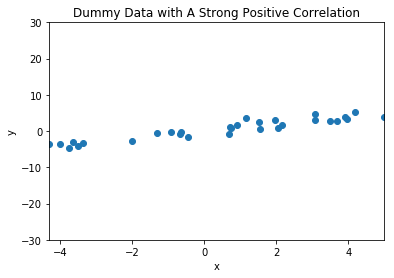

In [6]:
# @title Plot data on scatterplot
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(b_min, b_max)
plt.xlim(min(x), max(x))
plt.title("Dummy Data with A Strong Positive Correlation")
plt.show()

In [0]:
# @title Import some libraries we need for interactive plotting
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits import mplot3d

In [0]:
# @title Define functions for plotting
def loss(w, b):
  y_hat = w*x+b
  return ((y-y_hat)**2).sum()

def plot_loss(w, b, ax):
  X, Y = np.meshgrid(w_range, b_range)
  Z = np.array([[loss(w, b) for w in w_range] for b in b_range])
  # ax = plt.axes(projection='3d')
  ax.plot_surface(X, Y, Z, cmap='viridis', alpha=.3)
  ax.scatter3D([w], [b], [loss(w, b)])
  # ax.plot3D([w]*len(w_range), b_range, b_gradient(w), 'gray')
  # ax.plot3D(w_range, [b] * len(b_range), w_gradient(b), 'gray')
  ax.text(w, b, loss(w, b), "({},{}), Loss: {:.0f}".format(w, b, loss(w, b)))
  ax.set_title("Computer's Brain: Minimize the Loss")
  ax.set_xlabel('w')
  ax.set_ylabel('b')
  ax.set_zlabel('loss')


def plot_model(w, b, ax=None):
    ax = ax or plt.subplot()
    x, y = dummy_data()
    ax.scatter(x, y, label="Data")
    ax.set_ylim(b_min, b_max)
    ax.set_xlim(min(x), max(x))
    model = w*x+b
    ax.plot(x, model, color="r", label='Model: $\hat{{y}}$={:.2f}*x+{:.0f}'.format(w, b))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='upper left')
    ax.set_title('Fit Model To Data: ($R^2$: {:.2f})'.format(r2_score(y, model)))

def plot(w, b):
  fig = plt.figure(figsize=(15, 6))
  ax1 = plt.subplot(121)
  ax2 = plt.subplot(122, projection='3d')
  plot_model(w, b, ax1)
  plot_loss(w, b, ax2)

In [18]:
# @title Run this block to vizualize model fitting
# You may have to run this cell a few times to get the plot to show
interact(
  plot,
  w = widgets.IntSlider(value=-10, min=w_min, max=w_max, step=1),
  b = widgets.IntSlider(value=-25, min=b_min, max=b_max, step=1)
)
print("Adjust the parameters: w and b to fit the model to the data!")
plt.show()

interactive(children=(IntSlider(value=-10, description='w', max=11, min=-10), IntSlider(value=-25, description…

Adjust the parameters: w and b to fit the model to the data!


### Use Math to Fit Model

We can actually get the computer to do what we just did for us! We  do this using math. Our goal through the math is to get the lowest loss possible, i.e. "move the ball to the bottom of the bowl". This is called optimization. In the case of linear regression, this "moving of the ball" is called convex optimization and can be solved using simple derivatives. However, we won't cover that here. We will use a package to do the math for us. Pay attention to the parameters the model picked.

We will be using Scikit-Learn's LinearRegression class to do the math for us. Learn more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

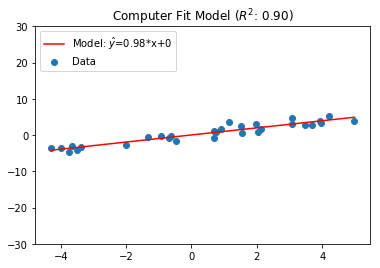

In [19]:
from sklearn.linear_model import LinearRegression

dummy_model = LinearRegression().fit(x.reshape(-1, 1), y)
y_hat = dummy_model.predict(x.reshape(-1, 1))

# Plot the original data and the line from our model.
plt.scatter(x, y, label='Data')
plt.plot(x, y_hat, 'r', label='Model: $\hat{{y}}$={:.2f}*x+{:.0f}'.format(dummy_model.coef_[0], dummy_model.intercept_))
# Set location of the legend of the plot.
plt.legend(loc='upper left')
plt.ylim(b_min, b_max)
plt.title("Computer Fit Model ($R^2$: {:.2f})".format(r2_score(y, y_hat)))
plt.show()

## Your First Neural Network!

Would you believe me if I told you you just made your first neural network model? Well you did! The figure below is what you'll generally see when people show neural networks.
- The circles are called **nodes**.
- The lines are **edges**. Notice how the edges are **weighted** with the parameters. 
- The figure can be thought of in terms of its sections of vertically aligned nodes, called **layers**. This network has 2 layers.
- The left-most layer is called the **input layer**. The input layer is where we feed in the features, one feature per node.
- The rightmost layer is called the **output layer** and is the node(s) that outputs our target.
- So how you read the figure is that the output node node is doing the simple computation of multiplying each feature (input node) by its corresponding parameter (edge weight) and summing all of those multiplications together. i.e. $\sum{\theta_ix_i}$ where $\theta_i$ is the $i^{th}$ parameter and $x_i$ is the $i^{th}$ input node.
- For those that are have seen this type of thing before, we are going to leave discussions of activation functions, output functions and hidden layers to later. But in case you were wondering, we could say this network is using the identity function as the activation function.

In [0]:
# @title Define functions for plotting a neural network
# import library for drawing graph
import networkx as nx

def draw_nn(w, b, ax):
  y_label = f'$\hat{{y}}$={w}*x\n+{b}*1'
  G = nx.DiGraph()
  G.add_edges_from([('1', y_label)], weight=b)
  G.add_edges_from([('x', y_label)], weight=w)

  edge_labels={('x', y_label): f'w = {w}', ('1', y_label): f'b = {b}'}

  pos = {'x': (0, 1), '1': (0, 0), y_label: (1, 1)}
  edges = G.edges()
  weights = [G[u][v]['weight'] for u,v in edges]
  # truncate so arrow doesn't get too fat
  weights = [min(abs(w), 10) for w in weights]

  nx.draw_networkx_nodes(G, pos, node_color='w', node_size=5000, edgecolors='k', ax=ax)
  nx.draw_networkx_labels(G, pos, ax=ax)
  nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, ax=ax)
  nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='k', arrows=True, node_size=5000, arrowsize=30, width=weights, ax=ax)

def plot(w, b):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
  plot_model(w, b, ax1)
  draw_nn(w, b, ax2)

In [22]:
# @title Run this block to vizualize your first neural network
# You may have to run this cell a few times to get the plot to show
interact(
  plot,
  w = widgets.IntSlider(value=-9, min=w_min, max=w_max, step=1),
  b = widgets.IntSlider(value=25, min=b_min, max=b_max, step=1)
)
print("Adjust the parameters: w and b to fit the model to the data!")
plt.show()

interactive(children=(IntSlider(value=-9, description='w', max=11, min=-10), IntSlider(value=25, description='…

Adjust the parameters: w and b to fit the model to the data!


See in the above visualization how your input layer (nodes on the left) consist of your data input ($x$) and the dummy input (1). These get multiplied by your parameters along the edges ($w$, $b$) to get a predicted value ($\hat{y}$) in the output node. If you set a parameter to 0, you essentially turn off that input.

## Post Hoc Analysis and Interpreting Results

Great, you can fit a model! Now what? You have to see if you did a good job fitting that model before you can go on interpreting results. Data can play tricks on you that you have to watch out for. We will point out one of those tricks in linear regression called *multicollinearity*.




#### House Price Data

<img src="https://cdn.vox-cdn.com/thumbor/rp-0KYsHXAmXi4MRksvU5NVNv_c=/0x0:5545x3762/1200x800/filters:focal(2330x1438:3216x2324)/cdn.vox-cdn.com/uploads/chorus_image/image/60095365/shutterstock_246334408.0.jpg" alt="alt" width="400"/>

We'll be using a simple dataset containing information about the house of prices and other factors about the houses in King Country, USA. For starters, we'll be using the sqrt of a house to predict pricing. 

Obviously, this will not be a perfect model because the price of a house depends on a lot of other things than sqft, but this will be a good starting point.

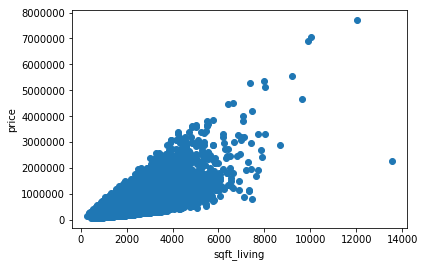

In [23]:
# Visualize the data
house_data = pd.read_csv('https://cosmos-api-prod-datasetsbucket-iuph41amgzfj.s3.amazonaws.com/house_data.csv')
# The scatter function is used to created a scatter plot. The first variable
# passed is plotted on the x-axis and the second on the y-axis.
plt.scatter(house_data['sqft_living'], house_data['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

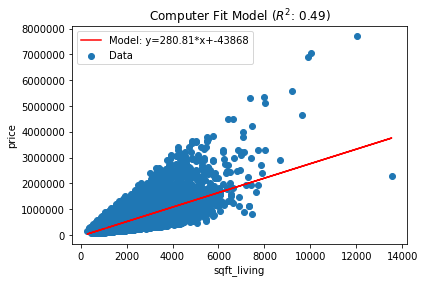

In [24]:
# Fit a (linear) model
x = house_data[['sqft_living']]
y = house_data['price']
house_model = LinearRegression().fit(x, y)
y_hat = house_model.predict(x)

# Plot the original data and the line from our model.
plt.scatter(x, y, label='Data')
plt.plot(x, y_hat, 'r', label='Model: y={:.2f}*x+{:.0f}'.format(house_model.coef_[0], house_model.intercept_))
# Set location of the legend of the plot.
plt.legend(loc='upper left')
plt.title("Computer Fit Model ($R^2$: {:.2f})".format(r2_score(y, y_hat)))
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

#### Interpretation of Results

1. $R^2$=0.23 which means that aproximately 49% of the house price can be explained by the sqrt of the house.
2. Note that the weight parameter ($w$) in our model fit is 280 meaning that a **1 sqft** increase in **sqft_living** corresponds to a **\$280** increase in **price**. We certainly have to take this interpretation with a grain of salt though as our $R^2$ is low.

One of the reasons our score is low is the lack of _features_. While the sqft of the house could give us some information about how much money it will make, there are a lot of other variables like location, age, condition, etc. Up ahead, we'll see how having more features can help us create better models, but also things we have to watch out for.

### Multiple Linear Regression

We saw how to create linear models that try to predict a variable using a single explanatory variable. But turned out that those don't really do a good job, because most of the time a single variable won't be able to give us enough information to predict. Now we'll try and upgrade to linear models that use 2 or more predictor variables.

Let's take a look at the other features in our data.

In [25]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,condition,grade,year_built
0,221900.0,3,1.00,1180,3,7,1955
1,538000.0,3,2.25,2570,3,7,1951
2,180000.0,2,1.00,770,3,6,1933
3,604000.0,4,3.00,1960,5,7,1965
4,510000.0,3,2.00,1680,3,8,1987


### Visualize Data

Let's look at how the price correlates with the other variables in our data. Can you tell which features have high correlation with price?

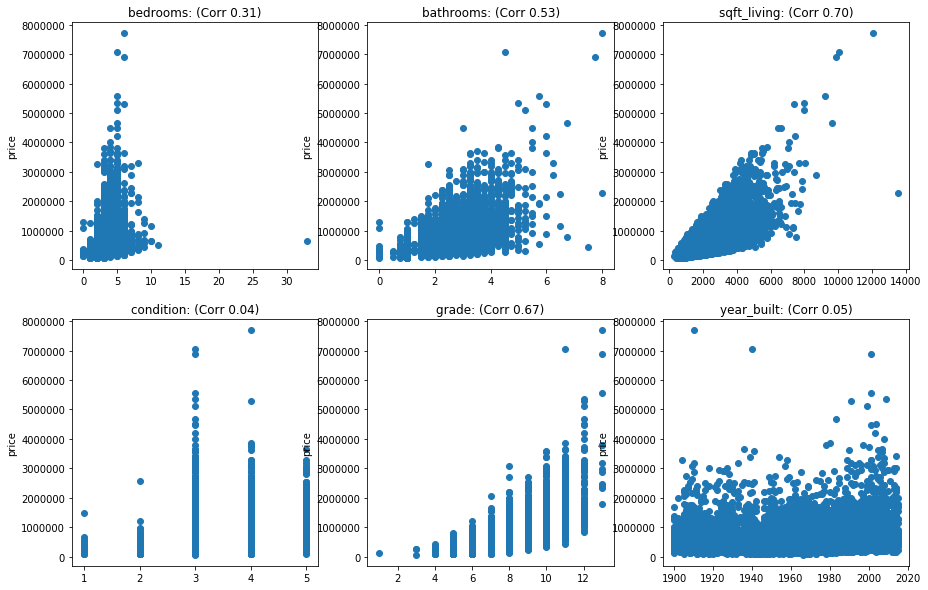

In [26]:
house_target_name = "price"
house_target = house_data[house_target_name]
# .drop will drop a row or column. We use axis=1 to drop the column
house_features = house_data.drop(house_target_name, axis=1)
house_feature_names = house_features.columns

fig = plt.figure(figsize=(15, 10))

# lets get correlation of price with our features
corr = house_data.corr()

# The enumerate function will give us the index as well as the value
for i, feature_name in enumerate(house_feature_names):
  # We have 6 predictor variables and we'll display them in a 3 row - 2 column matrix
  plt.subplot(2,3,i+1)
  plt.scatter(house_features[feature_name], house_target)
  plt.title("{}: (Corr {:.2f})".format(feature_name, corr[feature_name][house_target_name]))
  plt.ylabel(house_target_name)

We'll chose the following features for our model based on correlation:

* **bedrooms**: Number of bedrooms per house
* **bathrooms**: Number of Bathrooms per house
* **sqft_living**: Square footage of the entire house
* **year_build**: Year the house was built in

In [27]:
# Let's select the important features we'll be using in our model.
house_features_names = ['bedrooms', 'bathrooms', 'sqft_living', 'year_built']

house_features = house_data[house_features_names]

house_model = LinearRegression().fit(house_features, house_target)
house_score = house_model.score(house_features, house_target)

print("R2: {:.2f}".format(house_score))

R2: 0.55


Because our model depends on multiple variables, we won't be able to get a concise look at it, unlike what we did for the simple linear model. However, you can see that our score is higher than one we could get with a simple linear model. This is because our model **has more information** from more features and can thus form a better function to predict the house prices.



### Interpret Results (Failed Attempt)

The greatest advantage to linear regression (and logistic regression for classification problems) is the interpretability. We are able to report how much each feature influences our prediction. We need to be able to report why we made the prediction that we did. But there's a catch in this case. Let's see.

In [28]:
coef = house_model.coef_
intercept = house_model.intercept_
# The .0f in the following "{}*{:.0f}".format(f, c) rounds our coefficient to 0 decimal places
print("price =", int(intercept), "+", " + ".join(["{}*{:.0f}".format(f, c) for f, c in zip(house_features_names, coef)]))

price = 6028494 + bedrooms*-69667 + bathrooms*82969 + sqft_living*300 + year_built*-3071


Above, we see the exact equation in how our model is making predictions! Pretty cool. How we read this is "all other variables being held constant, increasing the sqft_living by one unit, on average, increases the price of the house by $300). See anything that seems anti-intuitive though? The bedrooms, you wouldn't expect the effect to be negative!

### Multicollinearity

Here is an example of the importance of post-hoc analysis. We fit a model, we tried to interpret. But theres something wrong. In this case, when two variables are giving the same or similar measure, the model has a hard time knowing which feature to attribute the effect to. And so we get some weird numbers. Let's see which variables are overlapping.

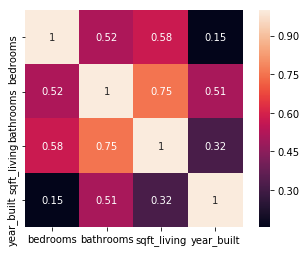

In [29]:
correlation_matrix = house_features.corr()
sns.heatmap(correlation_matrix, square=True, annot=True)
plt.show()

Seems like bathrooms and bedrooms have a high correlation with sqft_living (>0.50). We need to remove these features for interpretation since they're giving redundent information. We will keep sqft_living because we saw before that it has the best correlation with price.

In [30]:
house_features_names = ['sqft_living', 'year_built']
house_features = house_data[house_features_names]

house_model = LinearRegression().fit(house_features, house_target)
print(house_model.score(house_features, house_target))
coef = house_model.coef_
intercept = house_model.intercept_
print("price =", int(intercept), "+", " + ".join(["{}*{:.0f}".format(f, c) for f, c in zip(house_features, coef)]))

0.5247543939381332
price = 4549372 + sqft_living*305 + year_built*-2356


Can you interpret these results?

#### Afterword on Linear Regression Analysis
If you're interested to learn more about post hoc analysis on your linear regression model, see [this](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression).


### Neural Networks Teaser

We now have a model with two features! Let see how this would look like in a neural network.

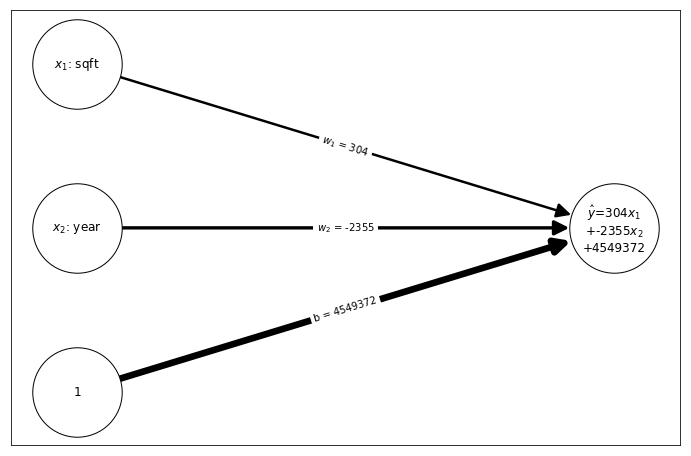

In [31]:
# @title Define functions for plotting a neural network
# import library for drawing graph
import networkx as nx

def draw_nn(w1, w2, b):
  fig =  plt.figure(figsize=(12,8))
  y_label = f'$\hat{{y}}$={w1}$x_1$\n+{w2}$x_2$\n+{b}'
  G = nx.DiGraph()
  x1_label = '$x_1$: sqft'
  x2_label = '$x_2$: year'
  G.add_edges_from([('1', y_label)], weight=b)
  G.add_edges_from([(x1_label, y_label)], weight=w1)
  G.add_edges_from([(x2_label, y_label)], weight=w2)

  edge_labels={(x1_label, y_label): f'$w_1$ = {w1}',
               (x2_label, y_label): f'$w_2$ = {w2}',
               ('1', y_label): f'b = {b}'}

  pos = {x1_label: (0, .5), x2_label: (0, 0), '1': (0, -.5), y_label: (1, 0)}
  edges = G.edges()
  weights = [np.log10(abs(G[u][v]['weight'])) for u,v in edges]
  # truncate so arrow doesn't get too fat
  weights = [min(abs(w), 10) for w in weights]

  nx.draw_networkx_nodes(G, pos, node_color='w', node_size=8000, edgecolors='k')
  nx.draw_networkx_labels(G, pos)
  nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
  nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='k', arrows=True, node_size=8000, arrowsize=30, width=weights)

draw_nn(*map(int, coef), int(intercept))

## Interpretability <> Accuracy Tradeoff

We start with linear regression because it is the most **interpretable** method, meaning we can explain very well *why* our machine learning model is predicting what it is and also how strongly we should trust it's predictions. As we move to more complex models, it becomes harder and harder to interpret our results.

<img src="https://miro.medium.com/max/1400/1*shNOspLyVn_2mvwves9MMA.png" alt="alt" width="600"/>

## Update Domain Knowledge

You can get lost in the data science and building some really cool models, but at the end of the day, your stakeholders will ask, *"so what"*. You need to give an easily understandable explaination of your work! Plots are also helpful in this. How would you update domain knowledge with your findings today?

Something along the lines of:

> "There seems to be a high positive correlation between sqft of a house and the price of the house. Aditionally, the year built seems to have a negative correlation. Using just these two features, we can explain about 55% of the pricing market. We need to do some more research on more features that would help us better predict the price of the house."

# Challenges - Training Simple Models

### Getting Points:

Each section of the challenge will have some instructions, please **carefully read these**. They will instruct you on how to 'submit' your answers. This will usually involve setting a variable to a specific value. 

#### Set the 'email' variable below to the email you used to sign up for Cosmos

In [0]:
email = "kiranrode@tamu.edu"  # e.g. email = "example@gmail.com"

## Wine Connoisseur?

<img src="https://img.mshanken.com/d/wso/bolt/Featured/Ratings/dailywinepicks_1600.jpg?w=800&q=90" alt="alt" width="400"/>


It’s a known fact that older the wine, better the taste. However, there are several factors other than age that go into wine quality certification which include physiochemical tests like alcohol quantity, fixed acidity, volatile acidity, determination of density, pH and more. The main goal of this machine learning project is to build a machine learning model to predict the quality of wines by exploring their various chemical properties. Wine quality dataset consists of 4898 observations with 11 independent and 1 dependent variable.


#### Challenge 1: Most Correlated With Rating?


In [36]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


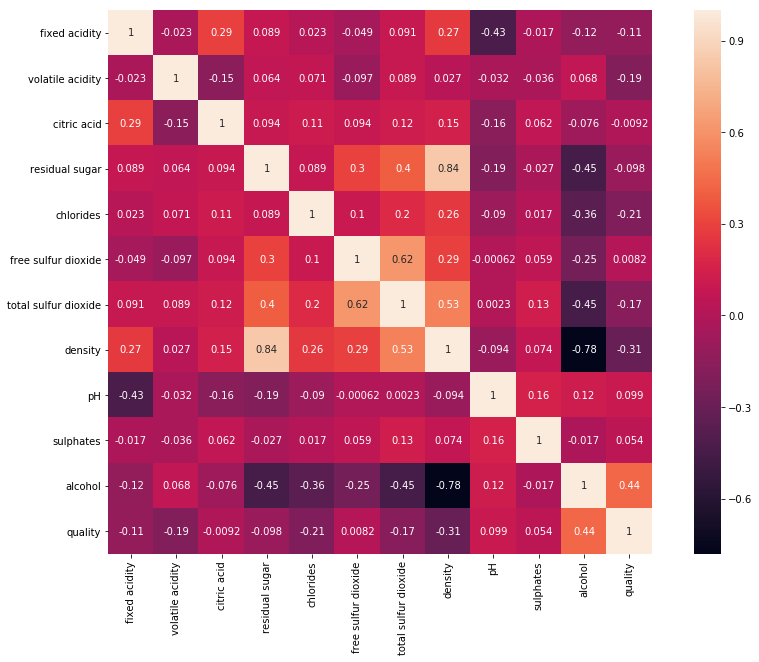

In [49]:
# YOUR CODE HERE...
fig = plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, square=True, annot=True)
plt.show()


# Set the following variable to the feature which has the highest correlation with 'quality'
most_correlated = 'alcohol'  # e.g. most_correlated = 'sulphates'

In [50]:
# @title Run to get points for: Most Correlated with Rating (10 Points)
tamu_datathon.judge_attempt('most_correlated', email, [most_correlated])

'Congratulations 🎉, you have completed the challenge! You earned 10 points.'

#### Challenge 2: Detect Mutlicollinearity

In [53]:
# Build a model with the following features: ["alcohol", "density", "residual sugar"]
# Find the variable that is causing multicollinearity and is least correlated to the target
# YOUR CODE HERE...
features_names = ['alcohol', 'density', 'residual sugar']

features = df[features_names]

target_name = "quality"
target = df[target_name]

wine_model = LinearRegression().fit(features, target)
wine_score = wine_model.score(features, target)

print("R2: {:.2f}".format(wine_score))


multicollinear_feature = 'residual sugar'  # e.g. multicollinear_feature = "alcohol"

R2: 0.21


In [54]:
# @title Run to get points for: Detect Multicollinearity (10 Points)
tamu_datathon.judge_attempt('multicollinear_feature', email, [multicollinear_feature])

'Congratulations 🎉, you have completed the challenge! You earned 10 points.'

#### Challenge 3: Interpreting a model

In [59]:
# Build a linear regression model with the features: ["alcohol", "density", "volatile acidity"]
# All other variables held constant, how much does 'quality' change with a one unit increase in 'alcohol'?
# Round your answer to 4 decimal places
# YOUR CODE HERE...

features_names = ['alcohol', 'density', 'volatile acidity']

features = df[features_names]

target_name = "quality"
target = df[target_name]

wine_model = LinearRegression().fit(features, target)
wine_score = wine_model.score(features, target)

print("R2: {:.2f}".format(wine_score))

print(wine_model.score(features, target))
coef = wine_model.coef_
intercept = wine_model.intercept_

print("price =", int(intercept), "+", " + ".join(["{}*{:.4f}".format(f, c) for f, c in zip(features_names, coef)]))


effect = 0.3989  # e.g. effect = 1.1234

R2: 0.25
0.24690635619896462
price = -36 + alcohol*0.3989 + density*38.9919 + volatile acidity*-2.0721


In [60]:
# @title Run to get points for: Interpreting a model (10 Points)
tamu_datathon.judge_attempt('interpreting_model', email, [effect])

'Congratulations 🎉, you have completed the challenge! You earned 10 points.'

## Take Home Challenge
### Largest data set ever recorded of the ocean temperatures.
![alt text](https://3c1703fe8d.site.internapcdn.net/newman/csz/news/800/2018/3-ocean.jpg)

Read up on the data here: https://www.kaggle.com/sohier/calcofi/version/2

Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity? Can you get better accuracy by including more features? Can you interpret the model for us? Can you plot highly correlated variables?

**Note:** This is big data! In fact, this is the largest data set of it's type (read more from link). In total, (864863 rows/samples, 74 columns). As such, It may take a little time to read in.


Read in the data from here: https://cosmos-api-prod-datasetsbucket-iuph41amgzfj.s3.amazonaws.com/water_data.csv